In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob

In [4]:
import bokeh

In [5]:
from bokeh.io import output_notebook

In [7]:
from bokeh.io import output_file, show
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.plotting import figure

In [8]:
df = pd.read_csv("raw_table_XY_for_training.csv")

def define_cell(x):
    cells=['K562','U2OS','HEK293T','HELA']
    for c in cells:
        if c in x:
            return c
    return "HEK293T"
df['cell'] = [define_cell(x) for x in df.sample_ID.tolist()]
df['group']=[x.split("_REP")[0] for x in df.sample_ID]


In [9]:
df.head()

,sample_ID,gRNA_id,pegRNA,PBS_RT,amplicon_seq,crispresso_result_dir,gene,pegRNA_old_id,readID,guess_target_mutation,...,nick_chr,nick_start,nick_end,nick_seq,nick_score,nick_strand,nick_gRNA_id,editing_frequency,cell,group
0,FIG5G_HEK293T_HEK3_6XHIS_PE3_REP3,HEK3_FIG5G_1HIS6INS,GCCCAGACTGAGCACGTGA,TGGAGGAAGCAGGGCTTCCTTTCCTCTGCCATCAATGATGGTGATG...,ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAG...,/research/rgs01/project_space/chenggrp/blood_r...,HEK3,HEK3_5g_1His6ins,HEK3_5g_1His6ins##GGCCCAGACTGAGCACGTGA##TGGAGG...,"177G-.-C,..-.-A,..-.-C,..-.-C,..-.-A,..-.-T,.....",...,chr9,110184723.0,110184743.0,GTCAACCAGTATCCCGGTGC,.,-,HEK3_4a_+90,0.596965,HEK293T,FIG5G_HEK293T_HEK3_6XHIS_PE3
1,FIG5G_HEK293T_HEK3_6XHIS_PE3_REP2,HEK3_FIG5G_1HIS6INS,GCCCAGACTGAGCACGTGA,TGGAGGAAGCAGGGCTTCCTTTCCTCTGCCATCAATGATGGTGATG...,ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAG...,/research/rgs01/project_space/chenggrp/blood_r...,HEK3,HEK3_5g_1His6ins,HEK3_5g_1His6ins##GGCCCAGACTGAGCACGTGA##TGGAGG...,"177G-.-C,..-.-A,..-.-C,..-.-C,..-.-A,..-.-T,.....",...,chr9,110184723.0,110184743.0,GTCAACCAGTATCCCGGTGC,.,-,HEK3_4a_+90,0.612772,HEK293T,FIG5G_HEK293T_HEK3_6XHIS_PE3
2,FIG5G_HEK293T_HEK3_6XHIS_PE3_REP1,HEK3_FIG5G_1HIS6INS,GCCCAGACTGAGCACGTGA,TGGAGGAAGCAGGGCTTCCTTTCCTCTGCCATCAATGATGGTGATG...,ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAG...,/research/rgs01/project_space/chenggrp/blood_r...,HEK3,HEK3_5g_1His6ins,HEK3_5g_1His6ins##GGCCCAGACTGAGCACGTGA##TGGAGG...,"177G-.-C,..-.-A,..-.-C,..-.-C,..-.-A,..-.-T,.....",...,chr9,110184723.0,110184743.0,GTCAACCAGTATCCCGGTGC,.,-,HEK3_4a_+90,0.747612,HEK293T,FIG5G_HEK293T_HEK3_6XHIS_PE3
3,FIG5E_U2OS_RNF2_1CG_PE3_REP3,RNF2_FIG5E_1CG,TCATCTTAGTCATTACCTG,AACGAACACCTCACGTAATGACTAAGATG,ACGTAGGAATTTTGGTGGGACACATACATTCAGACCATAGCACTTC...,/research/rgs01/project_space/chenggrp/blood_r...,RNF2,RNF2_5e_1CtoG,RNF2_5e_1CtoG##GTCATCTTAGTCATTACCTG##AACGAACAC...,179-G-C,...,chr1,185056714.0,185056734.0,TCAACCATTAAGCAAAACAT,.,+,RNF2_4c_+41,0.094074,U2OS,FIG5E_U2OS_RNF2_1CG_PE3
4,FIG5E_U2OS_RNF2_1CG_PE3_REP2,RNF2_FIG5E_1CG,TCATCTTAGTCATTACCTG,AACGAACACCTCACGTAATGACTAAGATG,ACGTAGGAATTTTGGTGGGACACATACATTCAGACCATAGCACTTC...,/research/rgs01/project_space/chenggrp/blood_r...,RNF2,RNF2_5e_1CtoG,RNF2_5e_1CtoG##GTCATCTTAGTCATTACCTG##AACGAACAC...,179-G-C,...,chr1,185056714.0,185056734.0,TCAACCATTAAGCAAAACAT,.,+,RNF2_4c_+41,0.082139,U2OS,FIG5E_U2OS_RNF2_1CG_PE3


In [68]:
df.columns

Index(['sample_ID', 'gRNA_id', 'pegRNA', 'PBS_RT', 'amplicon_seq',
       'crispresso_result_dir', 'gene', 'pegRNA_old_id', 'readID',
       'guess_target_mutation', 'other_options', 'original_seq',
       'original_mapping_rate', 'flag', 'Number_of_mutations',
       'target_mutation_correction', 'check_relative_position_flag', 'CHROM',
       'POS', 'REF', 'ALT', 'run_flag', 'reference_amplicon',
       'expected_outcome', 'fastq_data', 'PBS_length', 'RTS_length',
       'total_PBS_RTS_length', 'PBS_seq', 'RTS_seq', 'correct_pegRNA',
       'pegRNA_chr', 'pegRNA_start', 'pegRNA_end', 'pegRNA_name',
       'pegRNA_score', 'pegRNA_strand', 'PBS_chr', 'PBS_start', 'PBS_end',
       'PBS_name', 'PBS_score', 'PBS_strand', 'nickRNA_id', 'nick_chr',
       'nick_start', 'nick_end', 'nick_seq', 'nick_score', 'nick_strand',
       'nick_gRNA_id', 'editing_frequency', 'cell', 'group'],
      dtype='object')

In [12]:
# fig5G

In [21]:
def simple_plot_single_color(keyword,output,w=10,h=5,color1="lightblue",color2= "blue"):
    plot_df = df[df['sample_ID'].str.contains(keyword,case=False)]
#     print (plot_df.head())
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",color=color1,capsize=.2)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,alpha=0.5,color=color2,size=8)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")

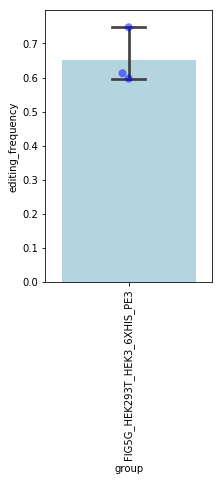

In [23]:
simple_plot_single_color("fig5G","Figure5G",w=3)


In [28]:
def plot_single_color(plot_df,order,output,w=10,h=5,color1="lightblue",color2= "blue"):
#     plot_df = df[df['sample_ID'].str.contains(keyword,case=False)]
#     print (plot_df.head())
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",color=color1,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,alpha=0.5,color=color2,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")

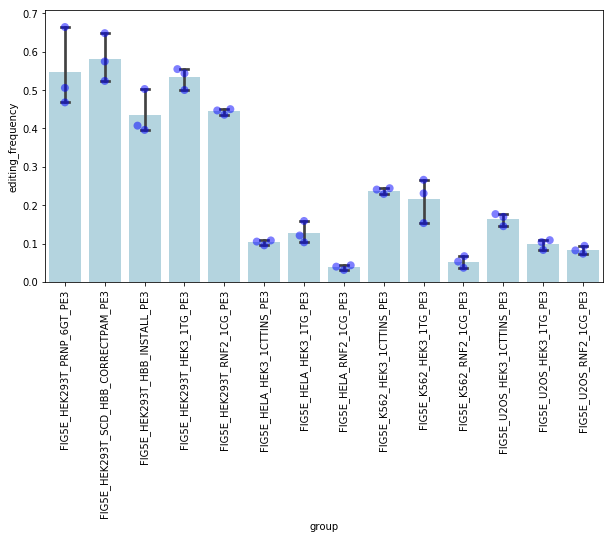

In [99]:
plot_df = df[df['sample_ID'].str.contains("fig5E",case=False)]
## FIG5E_HEK293T_HEK3_1CTTINS_PE3 is removed because its calculated editing efficiency is
## almost 0% comparing to the paper, which is 70%.
plot_df = plot_df[~plot_df['sample_ID'].str.contains("ED",case=False)]
plot_single_color(plot_df,plot_df.sort_values(['cell','POS']).group.unique().tolist(),"Figure5E",w=10,h=5,color1="lightblue",color2= "blue")

In [26]:
plot_df



,sample_ID,gRNA_id,pegRNA,PBS_RT,amplicon_seq,crispresso_result_dir,gene,pegRNA_old_id,readID,guess_target_mutation,...,nick_chr,nick_start,nick_end,nick_seq,nick_score,nick_strand,nick_gRNA_id,editing_frequency,cell,group
33,EDFIG5E_EMX1_9CT_REP3,EMX1_EDFIG5E_9CT,AGTCCGAGCAGAAGAAGAA,GTGATGGAAGCCCTTCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_9CtoT,EMX1_ED5e_9CtoT##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,177-C-T,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.007359,HEK293T,EDFIG5E_EMX1_9CT
390,FIG5E_HEK293T_HEK3_1CTTINS_PE3_REP3,HEK3_FIG5E_1CTTINS,GCCCAGACTGAGCACGTGA,GCCATCAAAGCGTGCTCAGTCTG,ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAG...,/research/rgs01/project_space/chenggrp/blood_r...,HEK3,HEK3_5e_1CTTins,HEK3_5e_1CTTins##GGCCCAGACTGAGCACGTGA##TCTGCCA...,"177G-.-C,..-.-T,..-.-T",...,chr9,110184723.0,110184743.0,GTCAACCAGTATCCCGGTGC,.,-,HEK3_4a_+90,0.075620,HEK293T,FIG5E_HEK293T_HEK3_1CTTINS_PE3
391,EDFIG5E_EMX1_2AT_REP1,EMX1_EDFIG5E_2AT,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCCCTACTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_2AtoT,EMX1_ED5e_2AtoT##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,170-A-T,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.075796,HEK293T,EDFIG5E_EMX1_2AT
401,EDFIG5E_EMX1_4GC_REP1,EMX1_EDFIG5E_4GC,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCCGTTCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_4GtoC,EMX1_ED5e_4GtoC##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,172-G-C,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.077385,HEK293T,EDFIG5E_EMX1_4GC
411,FIG5E_HEK293T_HEK3_1CTTINS_PE3_REP2,HEK3_FIG5E_1CTTINS,GCCCAGACTGAGCACGTGA,GCCATCAAAGCGTGCTCAGTCTG,ATGTGGGCTGCCTAGAAAGGCATGGATGAGAGAAGCCTGGAGACAG...,/research/rgs01/project_space/chenggrp/blood_r...,HEK3,HEK3_5e_1CTTins,HEK3_5e_1CTTins##GGCCCAGACTGAGCACGTGA##TCTGCCA...,"177G-.-C,..-.-T,..-.-T",...,chr9,110184723.0,110184743.0,GTCAACCAGTATCCCGGTGC,.,-,HEK3_4a_+90,0.079751,HEK293T,FIG5E_HEK293T_HEK3_1CTTINS_PE3
1523,FIG5E_HEK293T_SCD_HBB_CORRECTPAM_PE3_REP2,HBB_FIG5E_CORRECT,CATGGTGCATCTGACTCCTG,AGACTTCTCTTCAGGAGTCAGGTGCAC,GTCTTCTCTGTCTCCACATGCCCAGTTTCTATTGGTCTCCTTAAAC...,/research/rgs01/project_space/chenggrp/blood_r...,HBB,HBB_5e_correct,HBB_5e_correct##GCATGGTGCACCTGACTCCTG##AGACTTC...,"141T-C-.,142C-.-T,154G-A-.,154A-.-G",...,chr11,5248146.0,5248166.0,CCTTGATACCAACCTGCCCA,.,+,HBB_ED9a_+72,0.647916,HEK293T,FIG5E_HEK293T_SCD_HBB_CORRECTPAM_PE3
603,EDFIG5E_EMX1_2AC_REP3,EMX1_EDFIG5E_2AC,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCCCTGCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_2AtoC,EMX1_ED5e_2AtoC##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,170-A-C,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.129231,HEK293T,EDFIG5E_EMX1_2AC
702,EDFIG5E_EMX1_2AC_REP1,EMX1_EDFIG5E_2AC,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCCCTGCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_2AtoC,EMX1_ED5e_2AtoC##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,170-A-C,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.160632,HEK293T,EDFIG5E_EMX1_2AC
713,EDFIG5E_EMX1_2AC_REP2,EMX1_EDFIG5E_2AC,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCCCTGCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_2AtoC,EMX1_ED5e_2AtoC##GAGTCCGAGCAGAAGAAGAA##GTGATGG...,170-A-C,...,chr2,73161048.0,73161068.0,GACATCGATGTCCTCCCCAT,.,-,EMX1_4e_+53,0.163057,HEK293T,EDFIG5E_EMX1_2AC
726,EDFIG5E_EMX1_5GA_REP3,EMX1_EDFIG5E_5GA,AGTCCGAGCAGAAGAAGAA,GTGATGGGAGCTCTTCTTCTTCTGCTCGGA,CAGCTCAGCCTGAGTGTTGAGGCCCCAGTGGCTGCTCTGGGGGCCT...,/research/rgs01/project_space/chenggrp/blood_r...,EMX1,EMX1_ED5e_5GtoA,EMX1_ED5e_5GtoA##GAGTCCGAGCAGAAGAAGA

In [36]:
df[df.sample_ID.str.contains("CTT")][['sample_ID','editing_frequency']]

,sample_ID,editing_frequency
336,FIG5E_HEK293T_HEK3_1CTTINS_PE3_REP1,0.064403
390,FIG5E_HEK293T_HEK3_1CTTINS_PE3_REP3,0.075620
411,FIG5E_HEK293T_HEK3_1CTTINS_PE3_REP2,0.079751
477,EDFIG10_HELA_HEK3_1CTTINS_PE3_REP3,0.095315
478,EDFIG10_HELA_HEK3_1CTTINS_PE3_REP3,0.095315
479,FIG5E_HELA_HEK3_1CTTINS_PE3_REP3,0.095315
521,EDFIG10_HELA_HEK3_1CTTINS_PE3_REP2,0.105070
522,EDFIG10_HELA_HEK3_1CTTINS_PE3_REP2,0.105070
523,FIG5E_HELA_HEK3_1CTTINS_PE3_REP1,0.105070
530,EDFIG10_HELA_HEK3_1CTTINS_PE3_REP1,0.108090


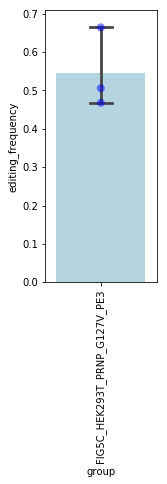

In [43]:
simple_plot_single_color("fig5C_H","Figure5C",w=2)


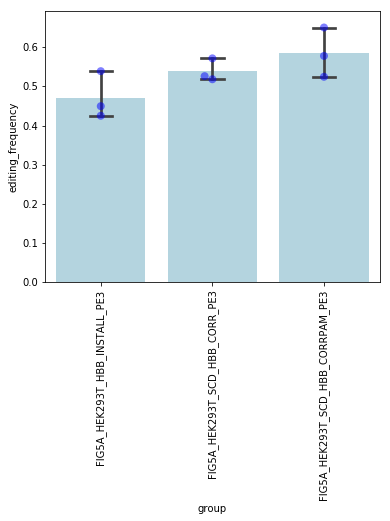

In [45]:
simple_plot_single_color("fig5A_H","Figure5A",w=6)


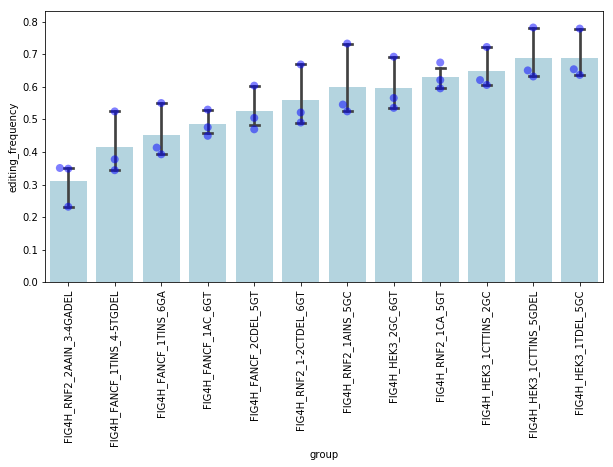

In [47]:
simple_plot_single_color("fig4H","Figure4H",w=10)


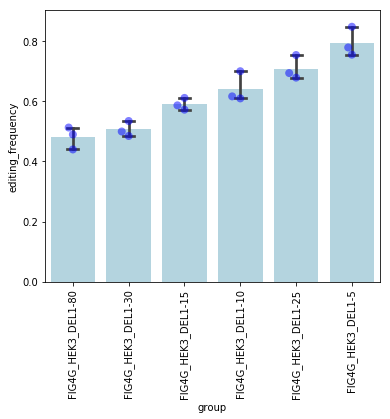

In [50]:
simple_plot_single_color("fig4G","Figure4G",w=6)


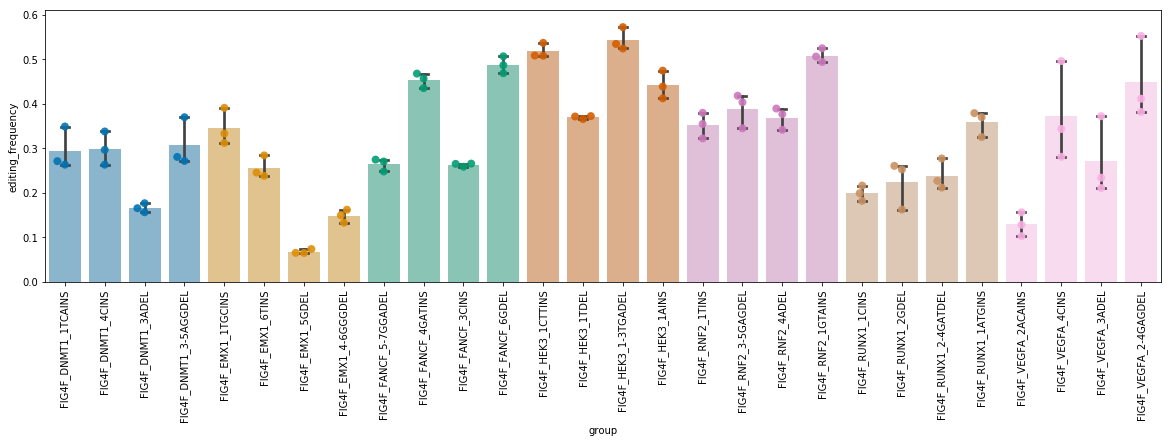

In [56]:
plot_df = df[df['sample_ID'].str.contains("fig4F",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('gene'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values("gene").group.unique().tolist(),gene_color,"Figure4F",w=20)

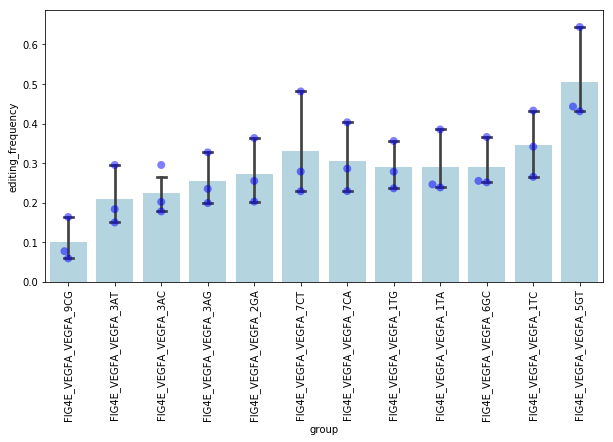

In [58]:
simple_plot_single_color("fig4E","Figure4E",w=10)


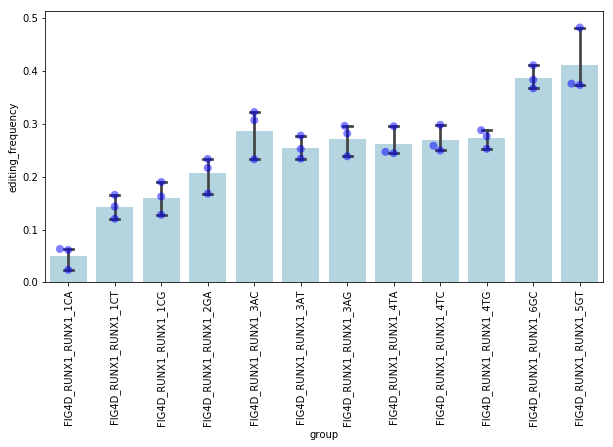

In [59]:
simple_plot_single_color("fig4D","Figure4D",w=10)


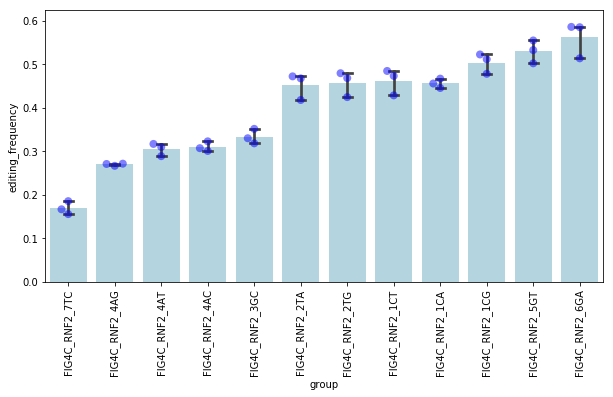

In [60]:
simple_plot_single_color("fig4C","Figure4C",w=10)


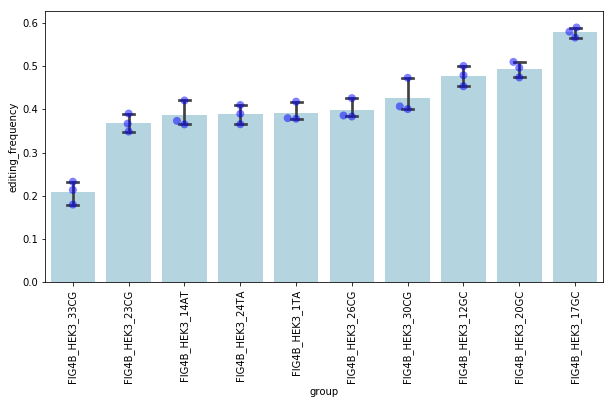

In [61]:
simple_plot_single_color("fig4B","Figure4B",w=10)


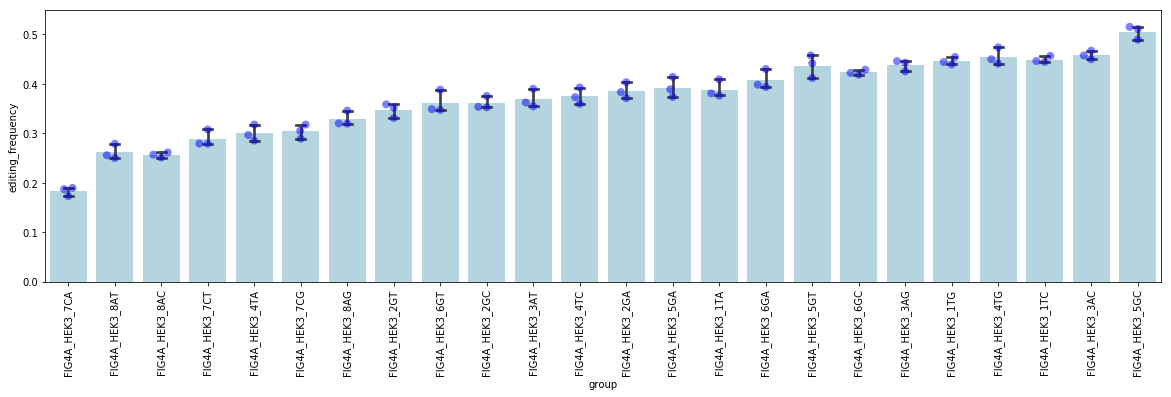

In [63]:
simple_plot_single_color("fig4A","Figure4A",w=20)


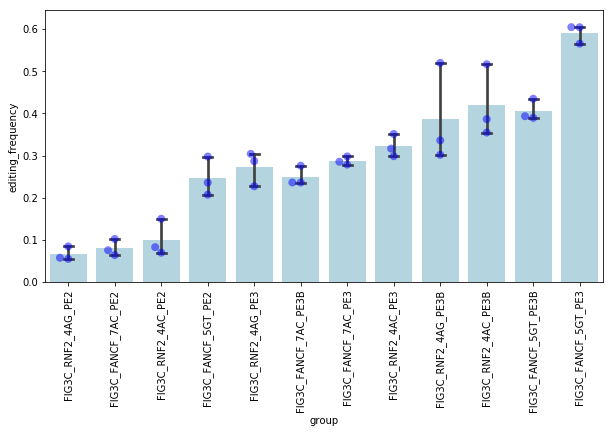

In [65]:
simple_plot_single_color("fig3C","Figure3C",w=10)


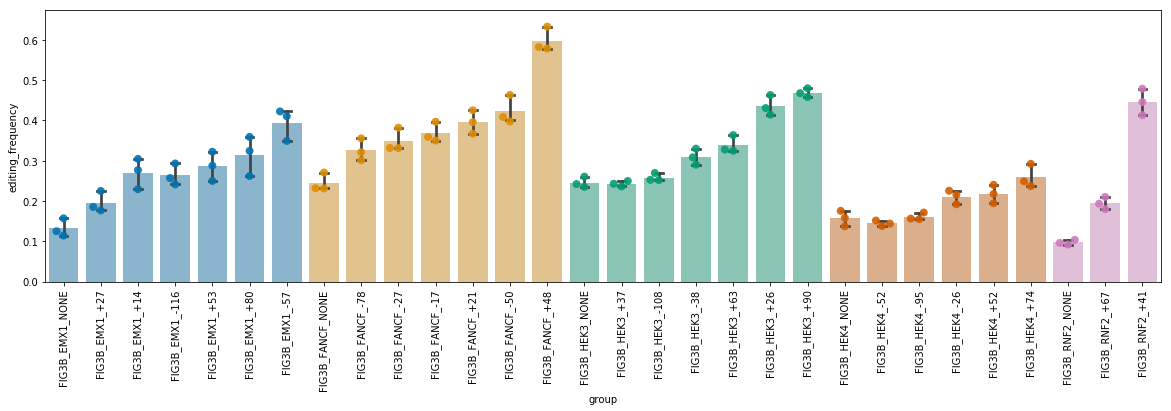

In [72]:
plot_df = df[df['sample_ID'].str.contains("fig3B",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('gene'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values(["gene",'POS']).group.unique().tolist(),gene_color,"Figure3B",w=20)

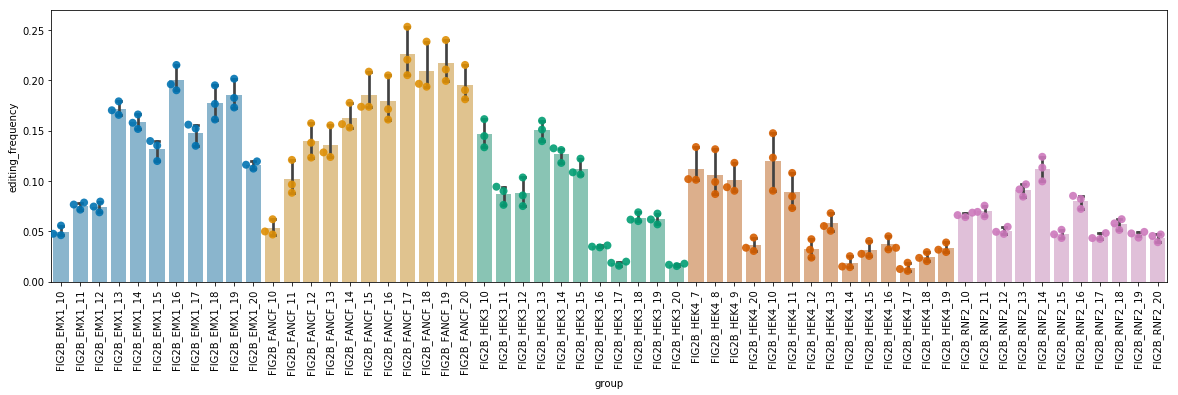

In [70]:
plot_df = df[df['sample_ID'].str.contains("fig2B",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('gene'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values(["gene",'RTS_length']).group.unique().tolist(),gene_color,"Figure2B",w=20)

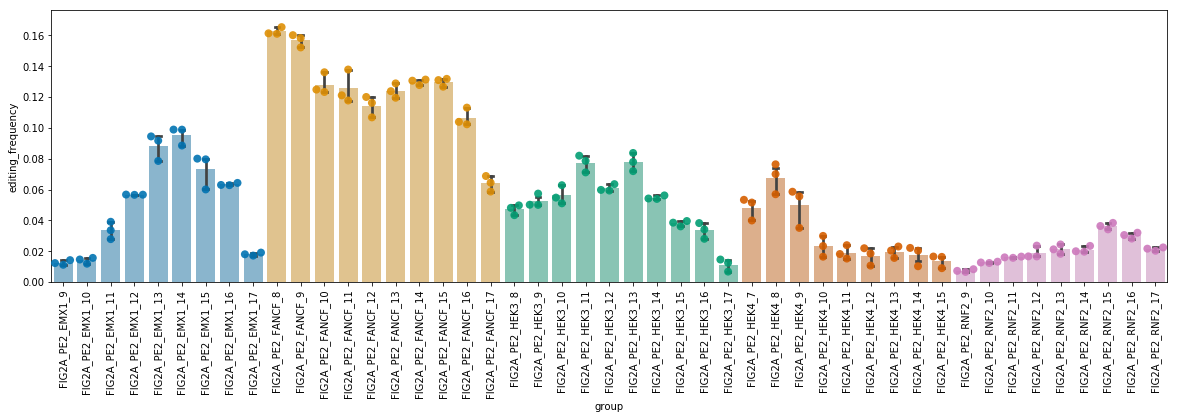

In [73]:
plot_df = df[df['sample_ID'].str.contains("fig2A",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('gene'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values(["gene",'PBS_length']).group.unique().tolist(),gene_color,"Figure2A",w=20)

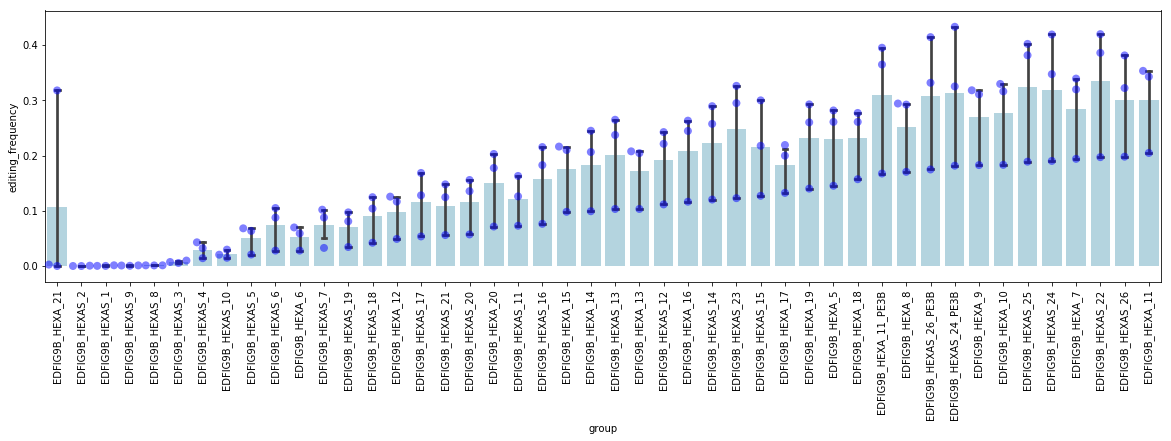

In [75]:
simple_plot_single_color("EDfig9B","EDfig9B",w=20)


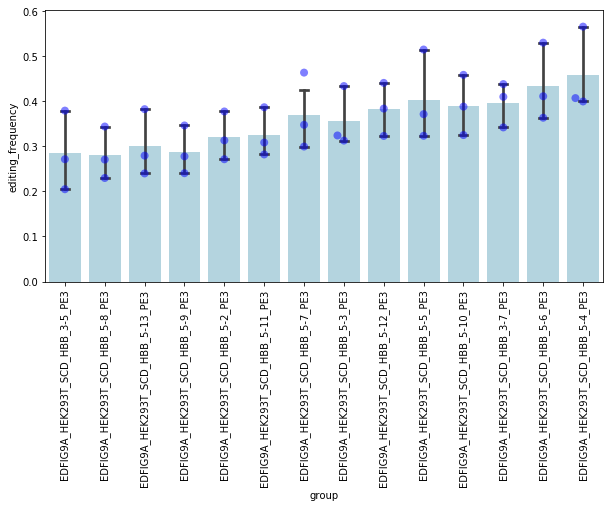

In [76]:
simple_plot_single_color("EDfig9A","EDfig9A",w=10)


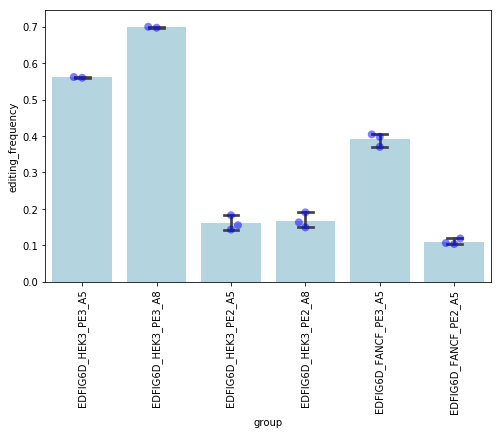

In [103]:

simple_plot_single_color("EDFIG6D","EDfig6D",w=8)
## there is a mislabel between A5 and A8 in the GEO database

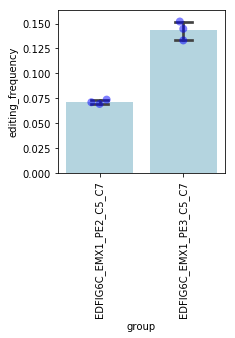

In [82]:

simple_plot_single_color("EDfig6c","EDfig6C",w=3,h=3)


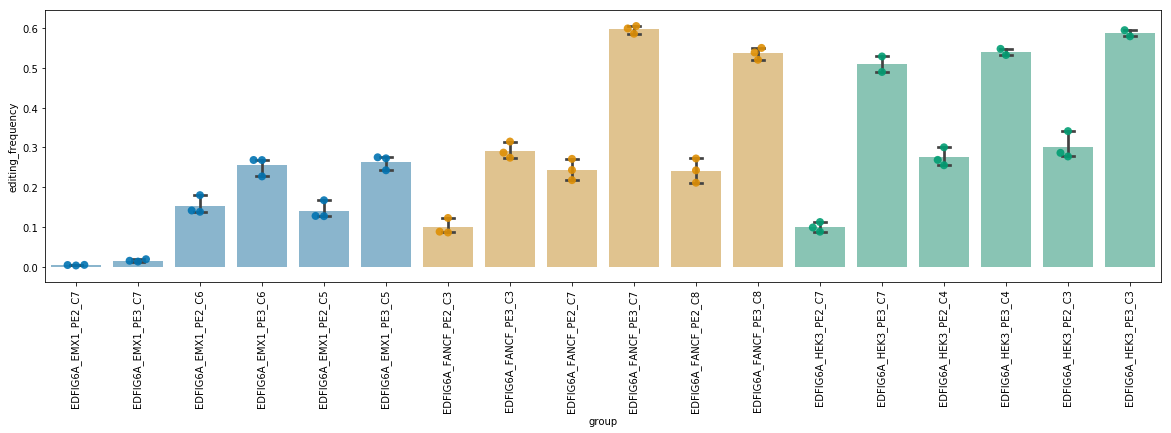

In [83]:
plot_df = df[df['sample_ID'].str.contains("EDfig6A",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('gene'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values(["gene",'POS']).group.unique().tolist(),gene_color,"EDfig6A",w=20)

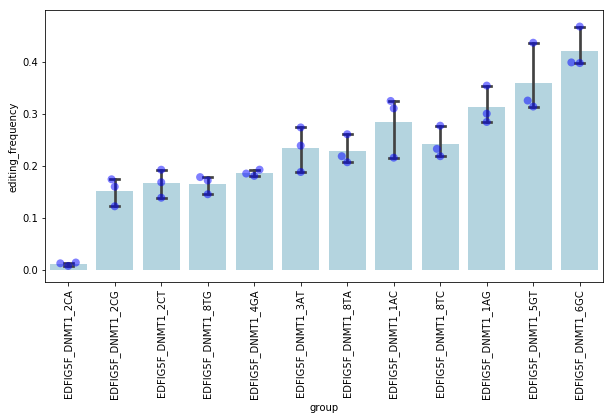

In [84]:

simple_plot_single_color("EDfig5f","EDfig5F",w=10)


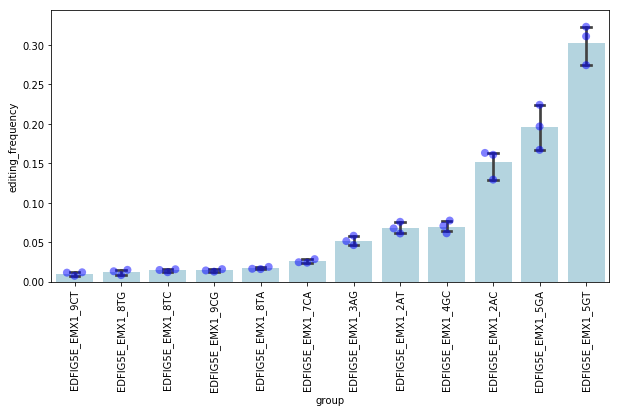

In [85]:

simple_plot_single_color("EDfig5E","EDfig5E",w=10)


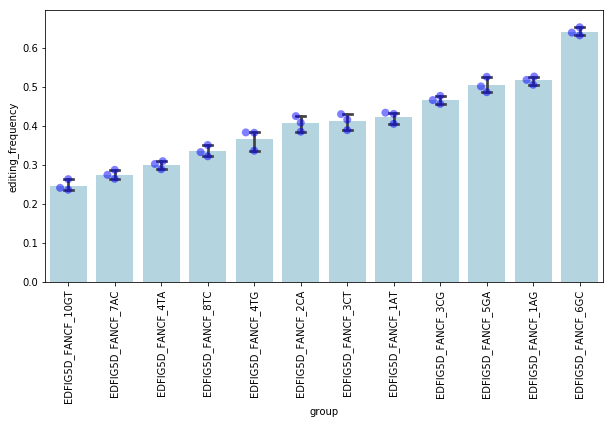

In [86]:

simple_plot_single_color("EDfig5D","EDfig5D",w=10)


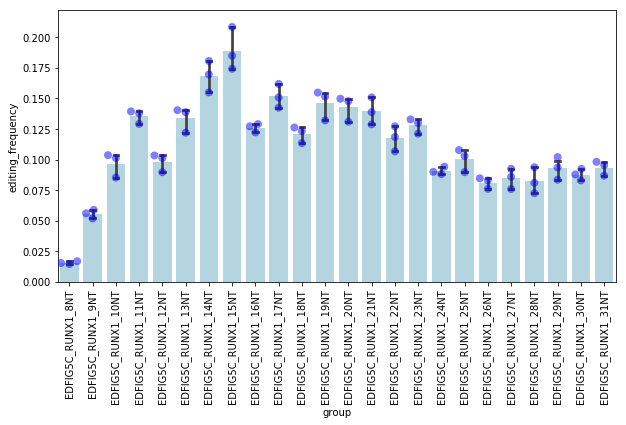

In [90]:
plot_df = df[df['sample_ID'].str.contains("EDfig5C",case=False)]
plot_single_color(plot_df,plot_df.sort_values('RTS_length').group.unique().tolist(),"EDfig5C",w=10,h=5,color1="lightblue",color2= "blue")


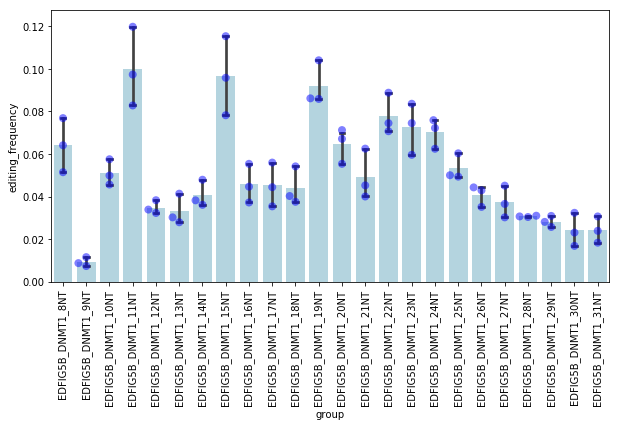

In [91]:
plot_df = df[df['sample_ID'].str.contains("EDfig5B",case=False)]
plot_single_color(plot_df,plot_df.sort_values('RTS_length').group.unique().tolist(),"EDfig5B",w=10,h=5,color1="lightblue",color2= "blue")


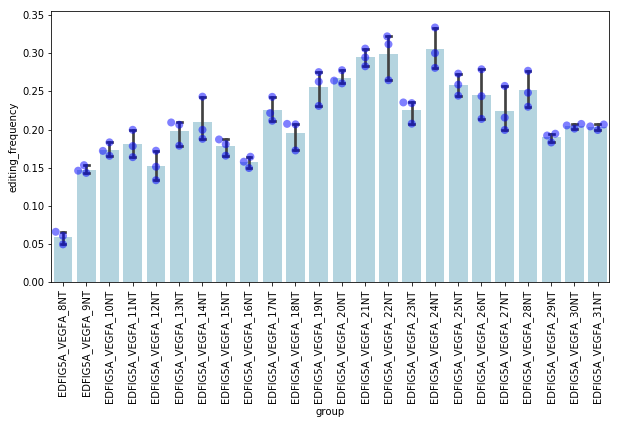

In [92]:
plot_df = df[df['sample_ID'].str.contains("EDfig5A",case=False)]
plot_single_color(plot_df,plot_df.sort_values('RTS_length').group.unique().tolist(),"EDfig5A",w=10,h=5,color1="lightblue",color2= "blue")


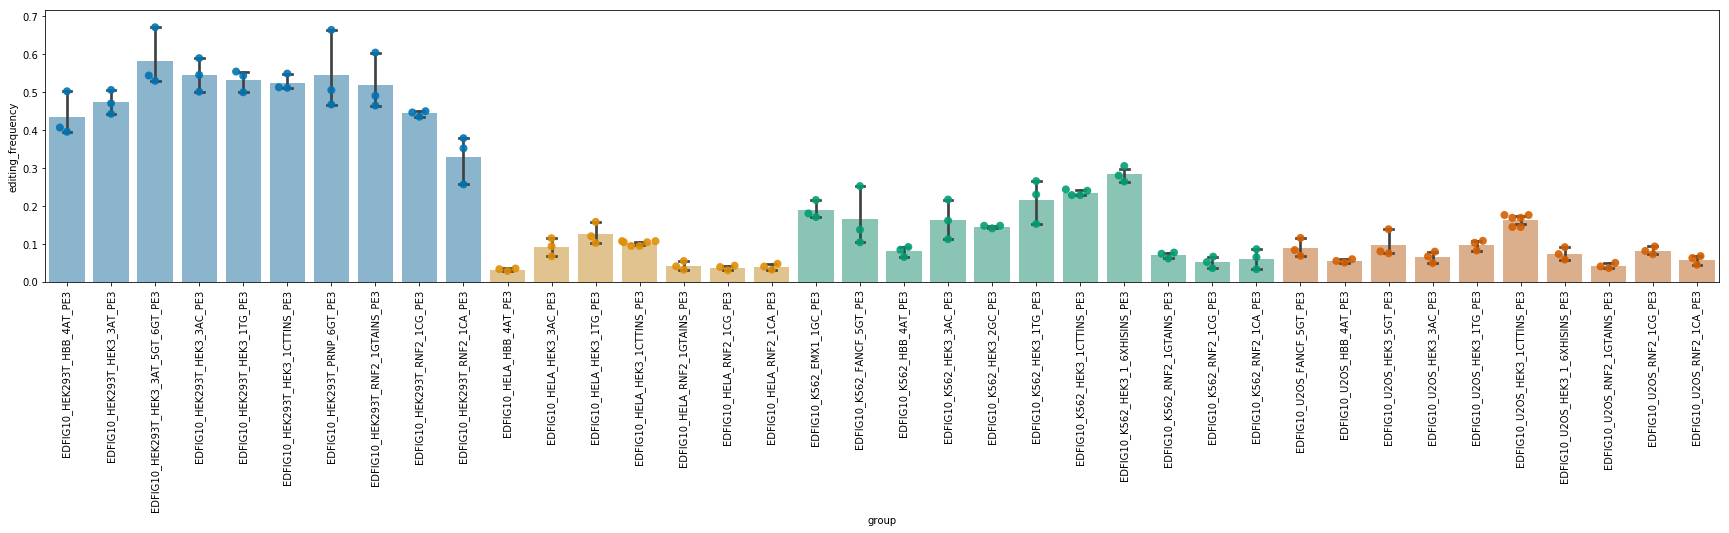

In [95]:
plot_df = df[df['sample_ID'].str.contains("EDfig10",case=False)]

colors = sns.color_palette("colorblind",10)
count = 0
gene_color={}
temp = plot_df.drop_duplicates('group')
for s,d in temp.groupby('cell'):
    for g in d.group.tolist():
        gene_color[g] = colors[count]
    
    count+=1

def plot_palette_color(plot_df,order,colors,output,w=10,h=5):
    plt.figure(figsize=(w,h))
    sns.barplot(data=plot_df,x="group",y="editing_frequency",palette=colors,alpha=0.5,capsize=.2,order=order)
    sns.swarmplot(data=plot_df,x="group",y="editing_frequency", zorder=10,palette=colors,alpha=0.9,size=8,order=order)
    plt.xticks(rotation=90) 
    plt.savefig("%s.pdf"%(output),bbox_inches="tight")
plot_palette_color(plot_df,plot_df.sort_values(["cell",'gene']).group.unique().tolist(),gene_color,"EDfig10",w=30)